In [55]:
import time

import torch
from matplotlib import pyplot as plt

#from pykeops.torch import LazyTensor

use_cuda = torch.cuda.is_available()
tensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

In [56]:
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import pandas as pd
import seaborn as sns
import json

In [57]:
def load_data(data_path):
    with open(data_path,"r") as fp:
        data=json.load(fp)
    inputs = data["mfcc"]
    targets= data["labels"]
    
    return inputs,targets

In [58]:
inputs,targets=load_data("/content/drive/MyDrive/mfcc_3.json")

In [59]:
type(inputs)

list

In [60]:
shape_diff=[]
for i in range(len(inputs)):
    shape_diff.append(np.array(inputs[i]).shape[0])

In [61]:
print(min(shape_diff),max(shape_diff))

12 1294


In [62]:
INPUTS2=np.array(inputs).copy()

INPUTS3=[]
for i in range(INPUTS2.shape[0]):
  A=np.zeros((max(shape_diff),13))#-np.array(INPUTS2[i]).shape[0]
  A[:np.array(INPUTS2[i]).shape[0],:]=INPUTS2[i]
  INPUTS3.append(A)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [63]:
Inputs4=[i.flatten() for i in INPUTS3]

In [66]:
xtrain=Inputs4[:1411].copy()
ytrain=targets[:1411].copy()

xtest=Inputs4[1411:].copy()
ytest=targets[1411:].copy()

In [67]:
x=tensor(xtrain)
y=tensor(ytrain)

In [71]:
xt=tensor(xtest)
yt=tensor(ytest)

In [68]:
!pip3 install fast-pytorch-kmeans


     |████████████████████████████████| 46 kB 1.7 MB/s 
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-py3-none-any.whl size=7086 sha256=66a7650a8648491ad768bba1e6181a7936ce49dd70c166755711b93c4cd5aea4
  Stored in directory: /root/.cache/pip/wheels/90/1c/31/71496b1753c1ca617185f8ef5e4fbb77a9d36facf5eb73b352
Successfully built fast-pytorch-kmeans


In [69]:
from fast_pytorch_kmeans import KMeans
import torch

kmeans = KMeans(n_clusters=2, mode='cosine', verbose=1)
kfit = kmeans.fit(x)

used 19 iterations (2.5045s) to cluster 1411 items into 2 clusters


In [80]:
sum(kmeans.predict(x)==y).cpu().numpy()*100/len(x)

49.46846208362863

In [63]:
labels

tensor([0, 0, 0,  ..., 0, 1, 0], device='cuda:0')

In [ ]:
Accu=[]
for i in range(5000):
    labels = kmeans.fit_predict(x)
    k=sum(labels==y).cpu().numpy()/1611
    Accu.append(k*100)

In [11]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
pca = PCA(n_components=60)
pca_result = pca.fit_transform(Inputs4)


In [13]:
pca_one=pca_result[:,0]
pca_two=pca_result[:,1]
pca_three=pca_result[:,2]

In [14]:
pcad=pd.DataFrame({"pca_one":pca_one,
                 "pca_two":pca_two,
                 "pca_three":pca_three,
                 "y":targets})

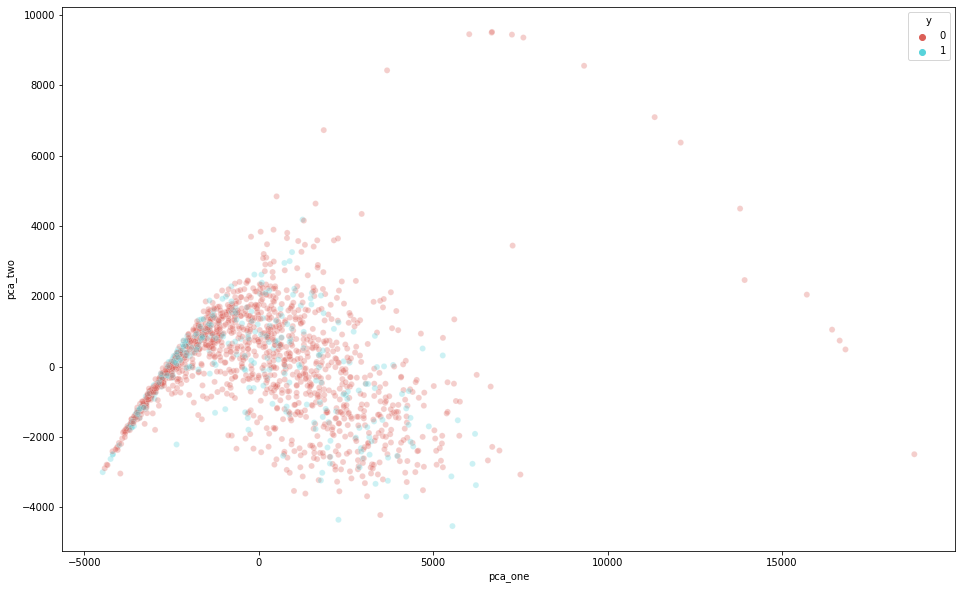

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=pcad,
    legend="full",
    alpha=0.3
)

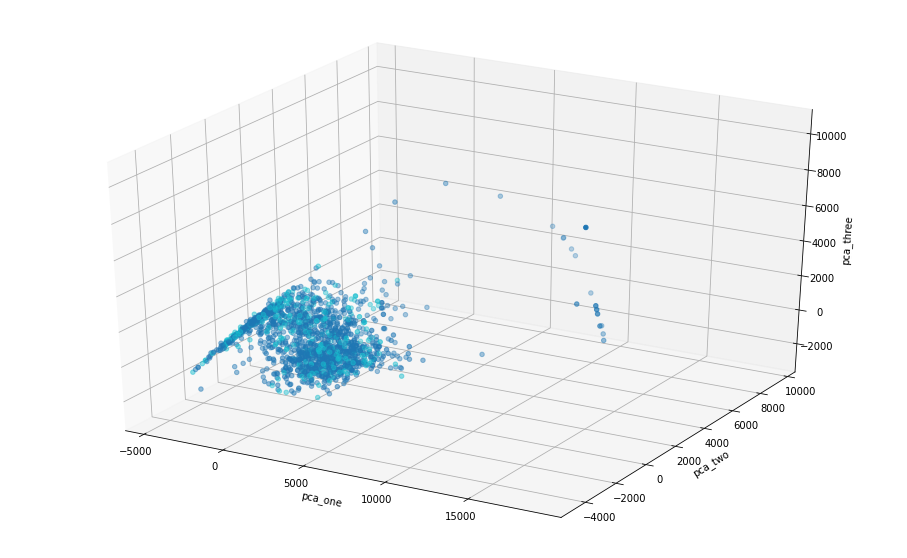

In [16]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pcad["pca_one"], 
    ys=pcad["pca_two"], 
    zs=pcad["pca_three"], 
    c=pcad["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca_one')
ax.set_ylabel('pca_two')
ax.set_zlabel('pca_three')
plt.show()

In [17]:
sum(pca.explained_variance_ratio_)

0.9008659972038332

In [18]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.2853056  0.10094193 0.05969139 0.03612016 0.02982805 0.02890001
 0.02651784 0.02182599 0.02164783 0.01969409 0.01807341 0.01769252
 0.01636546 0.01365265 0.01190553 0.01173569 0.01094309 0.00987792
 0.00909921 0.008769   0.00836113 0.0078417  0.00768378 0.00711463
 0.00685524 0.00627256 0.00576588 0.00572936 0.00548498 0.00522063
 0.00502747 0.00450697 0.00436277 0.00412644 0.00376269 0.0035375
 0.00344566 0.00325646 0.00306924 0.00294784 0.00272665 0.00264519
 0.00246231 0.00239697 0.00225717 0.00217275 0.00210009 0.00208713
 0.00194639 0.0018457  0.00178897 0.00170321 0.00162351 0.00155844
 0.00153242 0.00148593 0.00144578 0.00140947 0.00137324 0.00134437]


In [48]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=300, n_iter=1200)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 1611 samples in 0.004s...
[t-SNE] Computed neighbors for 1611 samples in 0.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1611
[t-SNE] Computed conditional probabilities for sample 1611 / 1611
[t-SNE] Mean sigma: 1613.376738
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.071449
[t-SNE] KL divergence after 700 iterations: 0.762751
t-SNE done! Time elapsed: 99.60087490081787 seconds


In [49]:
tsne_results[:,0]

array([ 16.681406 ,  -1.090933 ,   1.2196732, ...,  -3.8550105,
       -16.197279 , -16.065678 ], dtype=float32)

In [50]:
df_subset=pd.DataFrame({'tsne-2d-one':tsne_results[:,0],
                        'tsne-2d-two':tsne_results[:,1],
                        'tsne-2d-three':tsne_results[:,2],
                        'y':targets})

In [51]:
df_subset

,tsne-2d-one,tsne-2d-two,tsne-2d-three,y
0,16.681406,34.380817,32.959991,0
1,-1.090933,8.498540,41.933308,0
2,1.219673,38.331188,16.888262,0
3,-11.132877,7.950939,23.252230,0
4,-21.020849,4.369108,10.879705,0
...,...,...,...,...
1606,0.840237,-26.668554,16.669947,1
1607,-1.305423,31.480444,30.797834,1
1608,-3.855011,29.318800,2.752989,1
1609,-16.197279,-14.965667,-25.879473,1


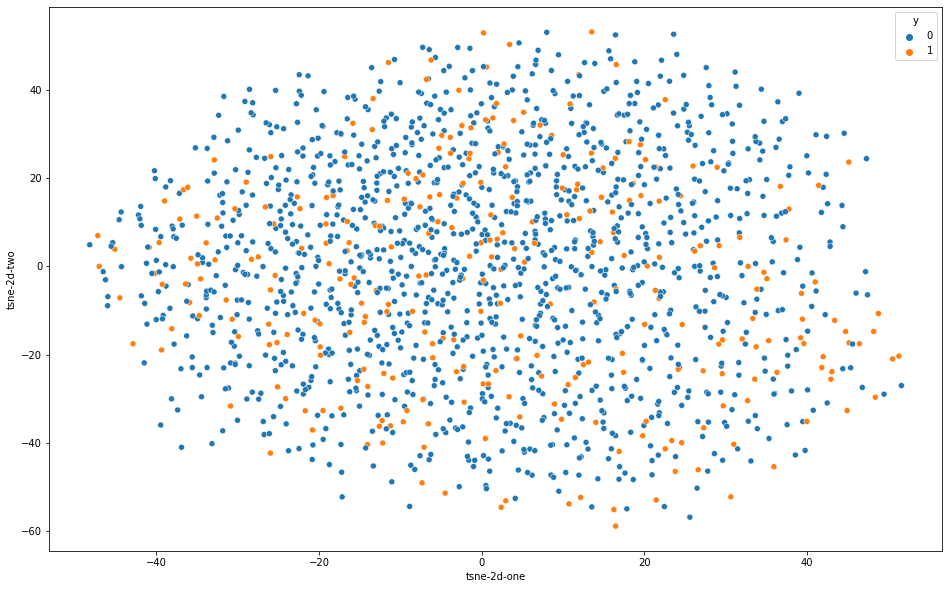

In [52]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    #palette=sns.color_palette(),
    palette=sns.color_palette("tab10", 2),
    data=df_subset,
    legend="full",
    #alpha=0.3
)

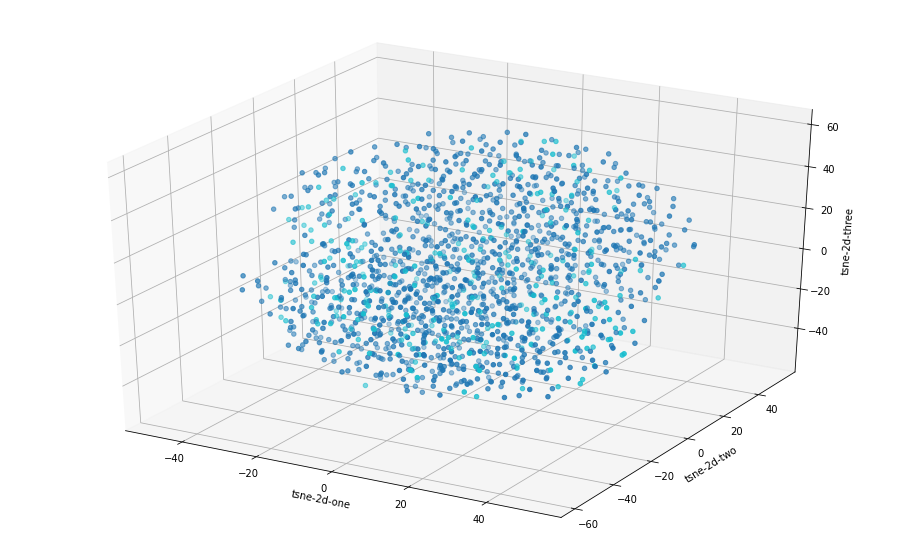

In [53]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset["tsne-2d-one"], 
    ys=df_subset["tsne-2d-two"], 
    zs=df_subset["tsne-2d-three"], 
    c=df_subset["y"], 
    cmap='tab10'
)
ax.set_xlabel("tsne-2d-one")
ax.set_ylabel("tsne-2d-two")
ax.set_zlabel("tsne-2d-three")
plt.show()

In [61]:
np.mean(Accu)

49.98100632998434